In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("mushroom.csv")

### EDA

In [4]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
data.shape

(2000, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
data.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


### Visualizations

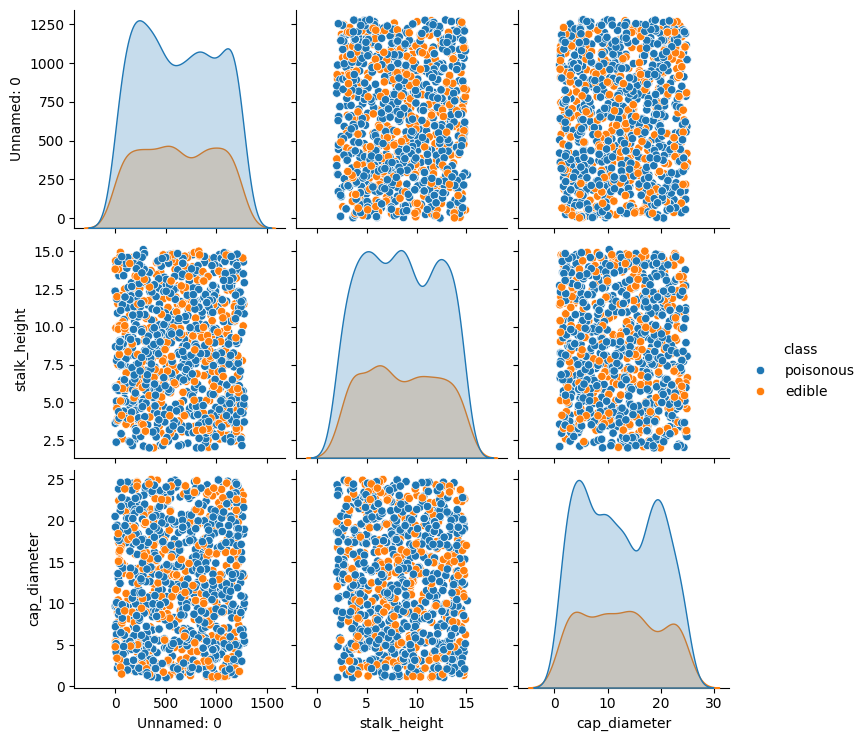

In [9]:
#pair plot
sns.pairplot(data,hue='class')
plt.show()

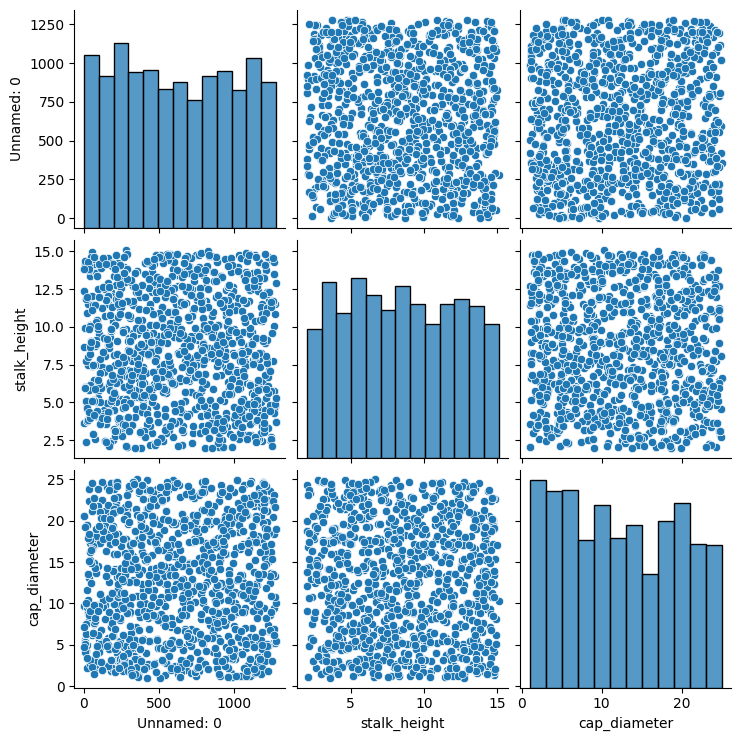

In [10]:
sns.pairplot(data)
plt.show()

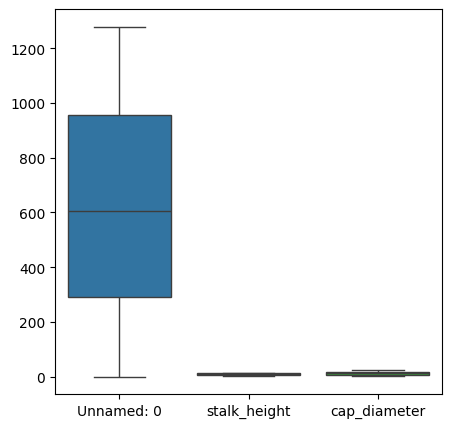

In [11]:
#box plot
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.show()

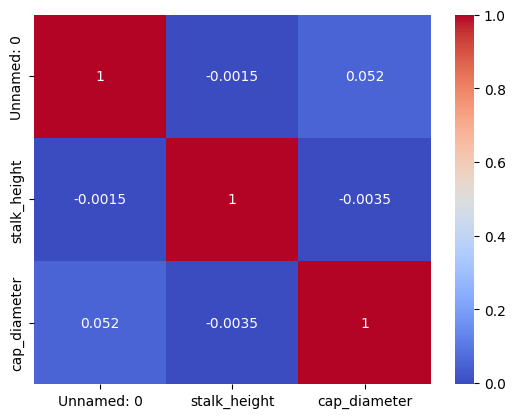

In [12]:
#correlation matrix
numerical_features = ['Unnamed: 0','stalk_height','cap_diameter']
sns.heatmap(data[numerical_features].corr(),annot =True,cmap='coolwarm')
plt.show()

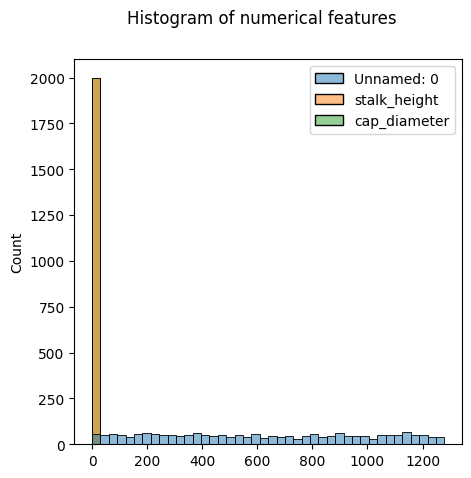

In [13]:
#histogram
plt.figure(figsize=(5,5))
plt.suptitle('Histogram of numerical features')
sns.histplot(data=data)
plt.show()

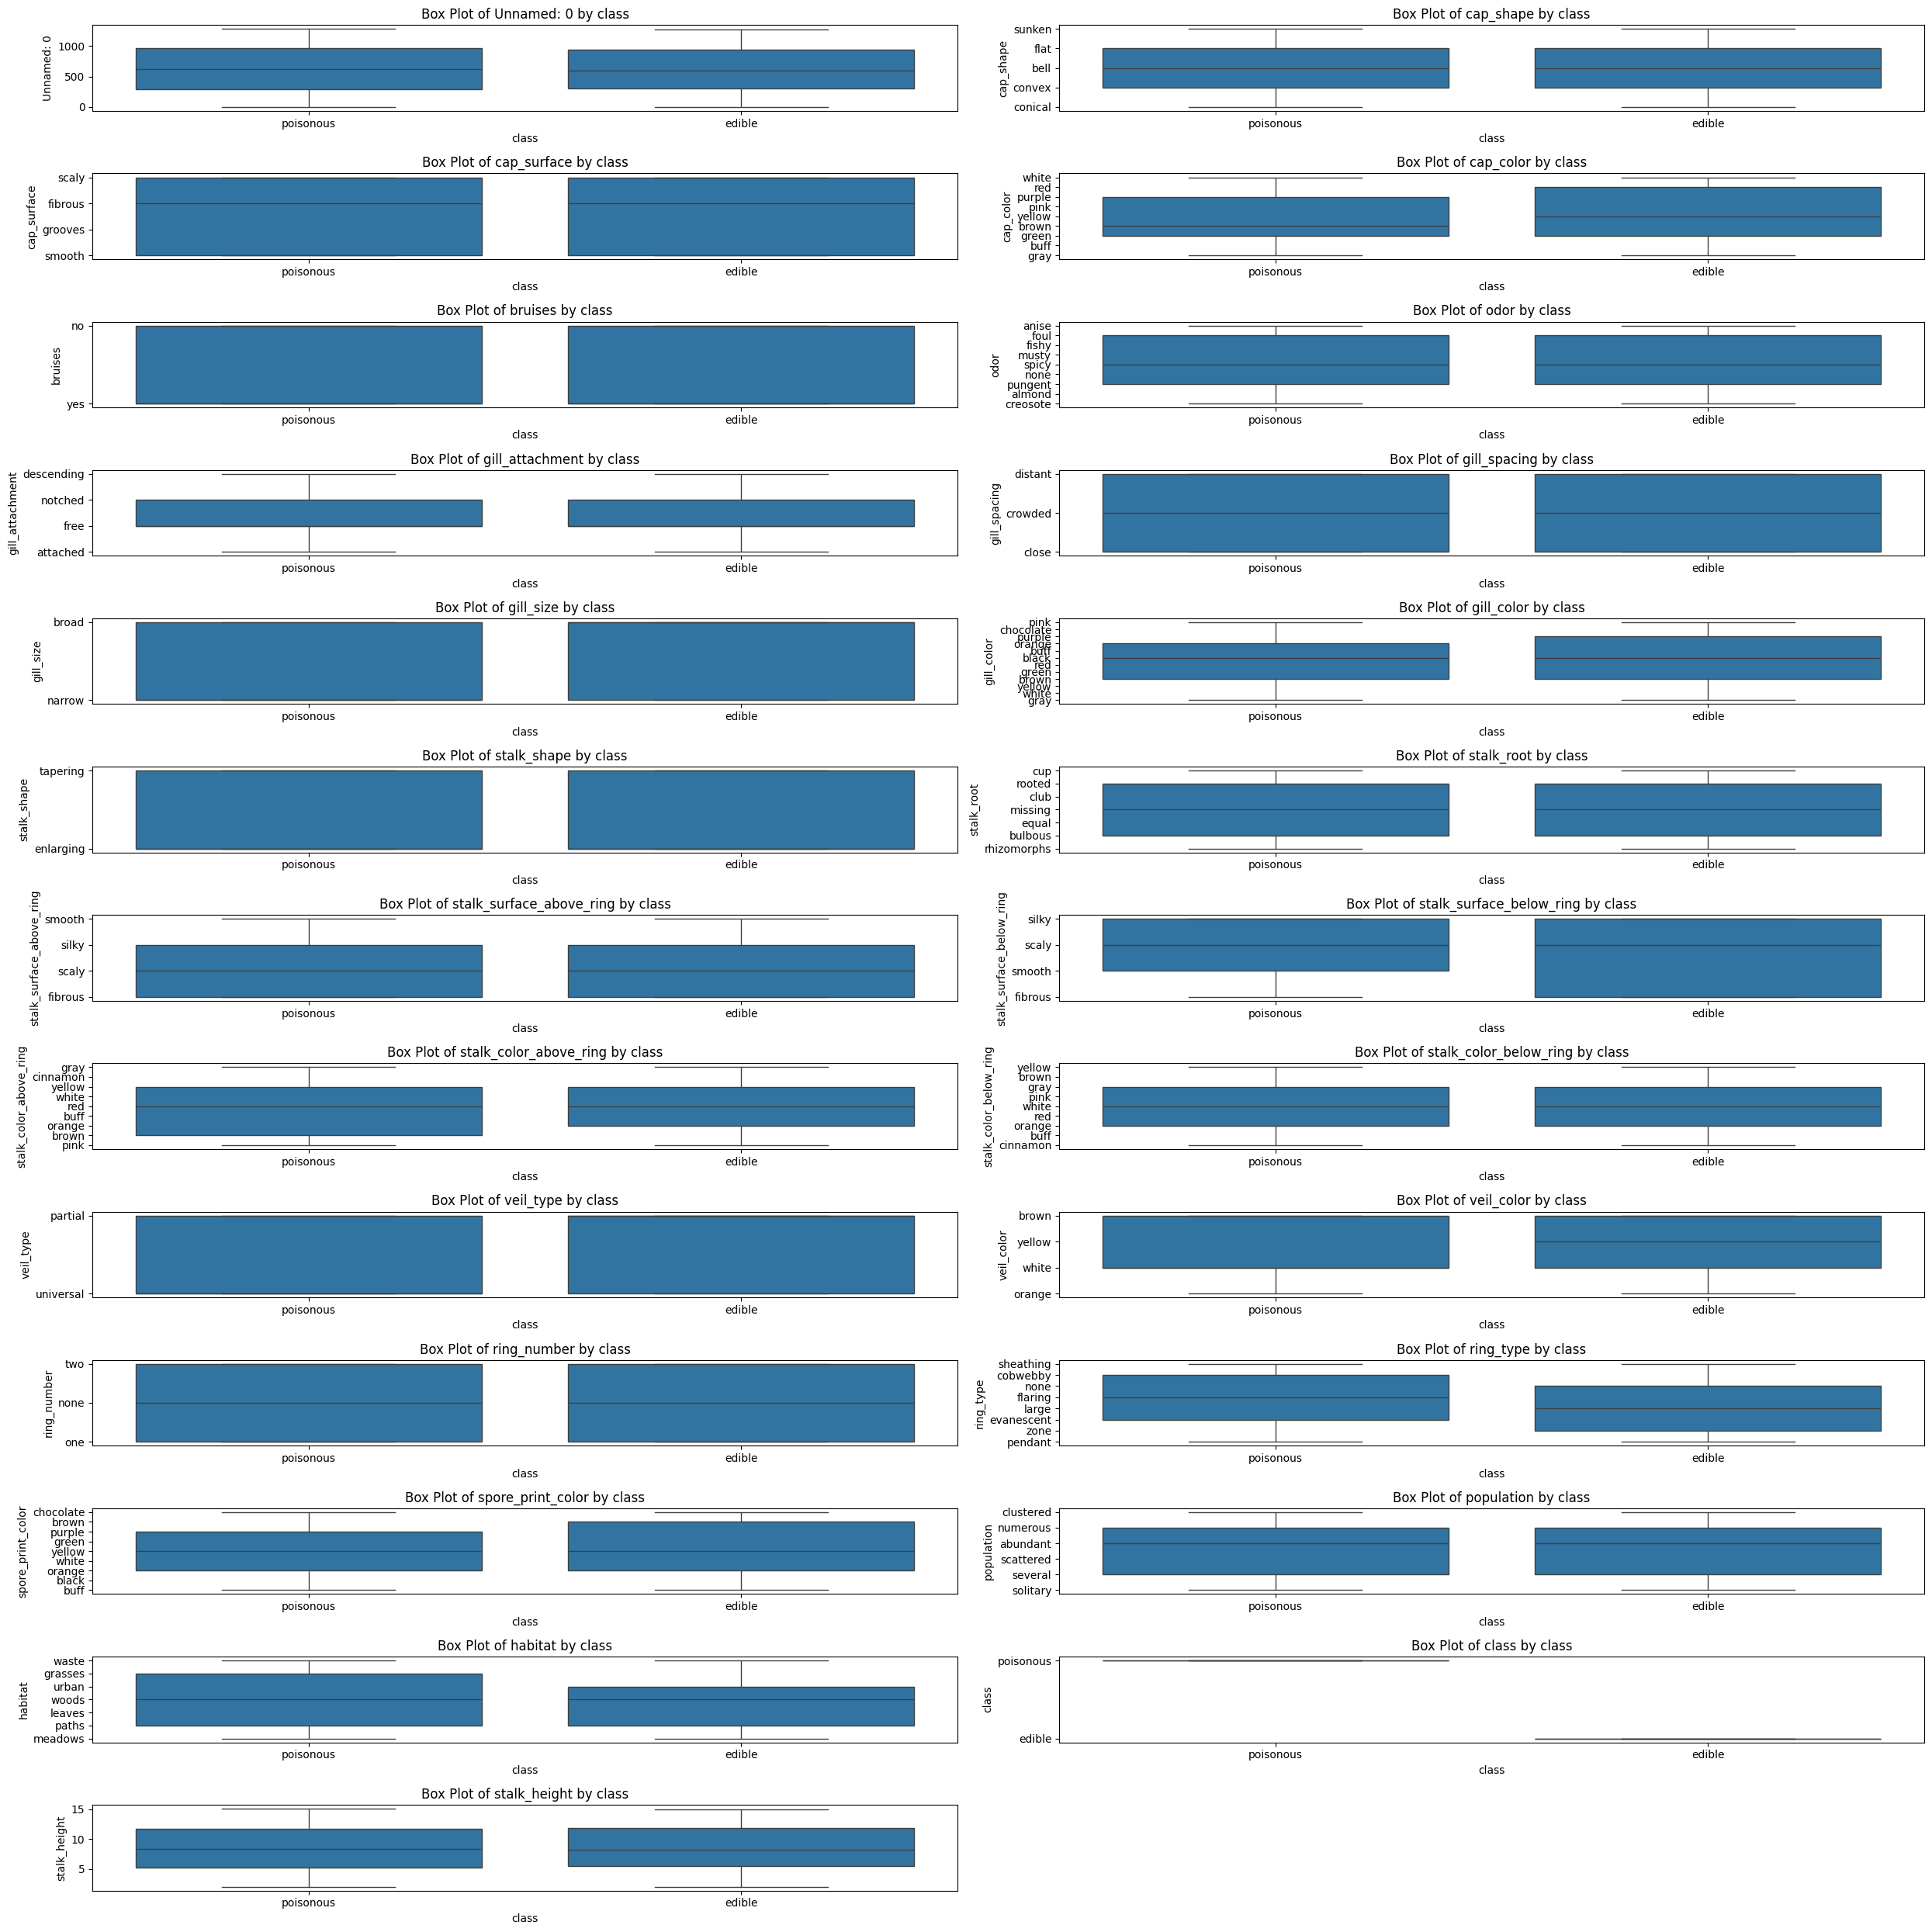

In [14]:
plt.figure(figsize=(25,25))
# Calculate the number of rows needed to display all box plots
num_rows = int(np.ceil(len(data.columns[:-1]) / 2))
for i, column in enumerate(data.columns[:-1], 1):
  # Create subplots with the correct number of rows
  plt.subplot(num_rows, 2, i)
  sns.boxplot(x='class', y=column, data=data)
  plt.title(f'Box Plot of {column} by class')
plt.tight_layout()
plt.show()

### Data Preprocessing


In [15]:
#Encoding
from sklearn.preprocessing import LabelEncoder
data1 = data.copy()


In [16]:
#splitting of data
X = data1.drop(['class'], axis=1)
y = data1["class"]

In [17]:

labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])

labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [18]:
X.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,916,190
1,786,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,128,750
2,246,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,537,281
3,221,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,234,829
4,630,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,895,484


In [19]:
y

array([1, 0, 1, ..., 1, 1, 1])

In [20]:
from sklearn.model_selection import train_test_split

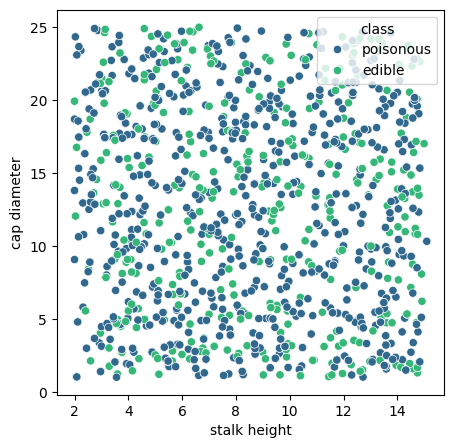

In [21]:
#scatter plot
plt.figure(figsize=(5,5))
sns.scatterplot(x='stalk_height',y='cap_diameter',hue='class',palette = 'viridis',data=data1)
plt.xlabel('stalk height')
plt.ylabel('cap diameter')
plt.show()

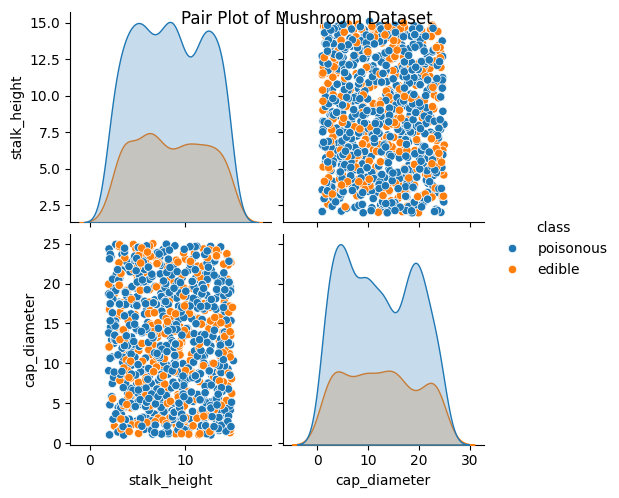

In [22]:
#pairplot

sns.pairplot(data, hue='class', vars=['stalk_height', 'cap_diameter'])
plt.suptitle('Pair Plot of Mushroom Dataset')
plt.show()


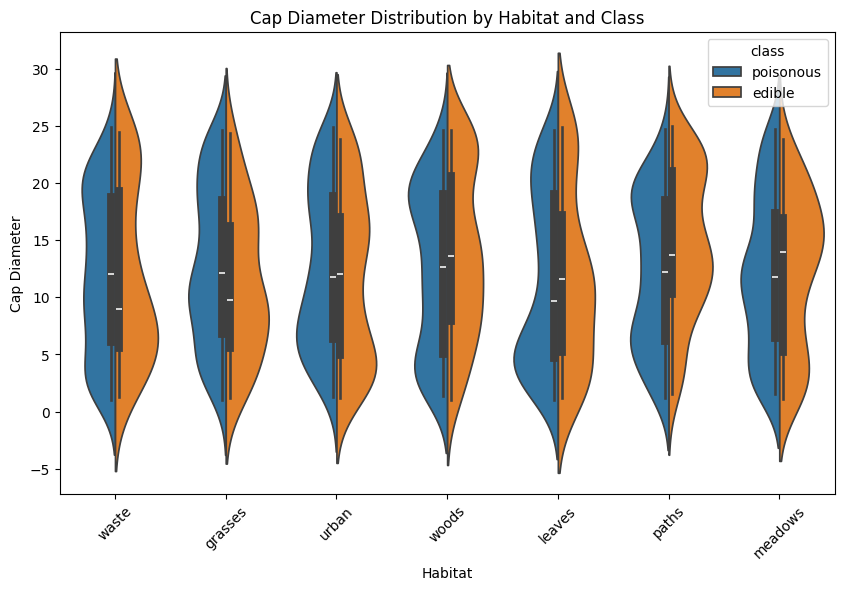

In [23]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='habitat', y='cap_diameter', hue='class', data=data1, split=True)
plt.title('Cap Diameter Distribution by Habitat and Class')
plt.xlabel('Habitat')
plt.ylabel('Cap Diameter')
plt.xticks(rotation=45)
plt.show()

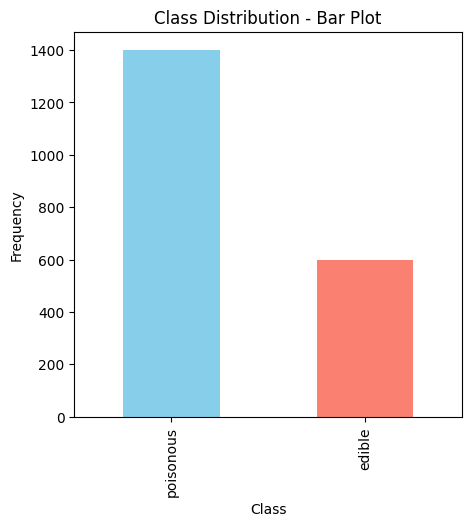

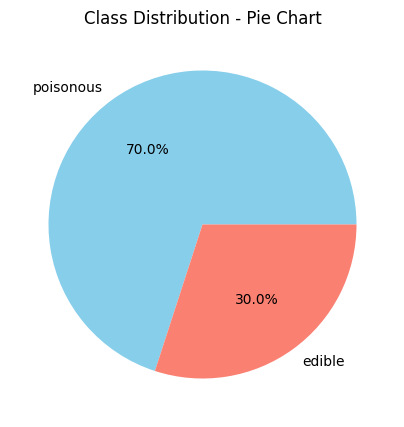

In [24]:
 #Bar plot
plt.figure(figsize=(5,5))
data1['class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution - Bar Plot')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


# Pie chart
plt.figure(figsize=(5,5))
data1['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution - Pie Chart')
plt.ylabel('')
plt.show()

### SVM Implementation

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [26]:
filename = 'mushroom.csv'
names = data1.columns
dataframe = pd.read_csv(filename,names=names)



In [27]:
x = data1.drop(columns=['class'])
y = data1['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=43)


In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 25), (1600,), (400, 25), (400,))

### Grid Search CV

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=43)

In [30]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [31]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.86625)

In [32]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 89.0


array([[ 64,  44],
       [  0, 292]])

In [33]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 64  44]
 [  0 292]]
              precision    recall  f1-score   support

      edible       1.00      0.59      0.74       108
   poisonous       0.87      1.00      0.93       292

    accuracy                           0.89       400
   macro avg       0.93      0.80      0.84       400
weighted avg       0.90      0.89      0.88       400



### parameter tuning

In [37]:
#Fitting the model on SVC with default parameters
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

In [38]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(X_test)
accuracy_score(y_test,pred_svc)

0.73

In [40]:
#Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       108
   poisonous       0.73      1.00      0.84       292

    accuracy                           0.73       400
   macro avg       0.36      0.50      0.42       400
weighted avg       0.53      0.73      0.62       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [49]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

# Fit the GridSearchCV object to the data (replace X and y with your actual data)
grid.fit(X, y) # You need to provide your training data (X and y) here

print(grid.best_params_)
print(grid.best_estimator_.get_params())